# Проект: принятие решений в бизнесе

Цель заключается в приоритизации гипотез, полученных от отдела маркетинга, в запуске A/B-теста и анализе результатов.

План:
- Приоритизация гипотез
- Анализ A/B-теста
- Вывод

## Приоритизация гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

Приведем название колонок к змеиному регистру.

In [5]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


In [6]:
hypothesis['rice'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Вывод: При применении способа ICE топ-3 занимали гипотезы с индификатором 8, 0, 7, так как у них были высокие показатели Impact, Confidence. При применении способа RICE Топ-3 занимали гипотезы с индификатором 7, 2, 0, так как у них высокий показатель Reach, чего не было у предыдущих гипотез. Разница между RICE и ICE заключается в том, что R (Reach-охват) является модификацией ICE, которая добавляет оценку скольких пользователей затронет это изменение. Поэтому поменялось лидерство при применении второго способа.

## Анализ A/B-теста

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
display(orders.isna().sum())
display(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [11]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [13]:
date_group = orders[['date', 'group']].drop_duplicates()

In [14]:
orders_agg = date_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

visitors_agg = date_group.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [15]:
cummulative_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cummulative_data.columns = [
    'date',
    'group',
    'transactions',
    'buyers',
    'revenue',
    'visitors',
]
cummulative_data.head(20)

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


### График кумулятивной выручки по группам

In [16]:
cummulative_a = cummulative_data[cummulative_data['group']=='A']
cummulative_b = cummulative_data[cummulative_data['group']=='B']

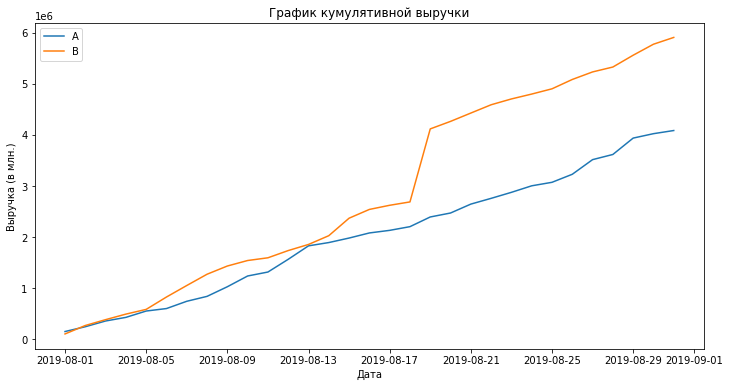

In [17]:
plt.figure(figsize=(12, 6))
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка (в млн.)')
plt.plot(cummulative_a['date'], cummulative_a['revenue'], label='A')
plt.plot(cummulative_b['date'], cummulative_b['revenue'], label='B')
plt.legend();

Вывод: Выручка стабильно растет, но группа B приносит больше прибыли. Возможно, в группу B в начале второй половины появились крупные заказы.

### График кумулятивного среднего чека по группам

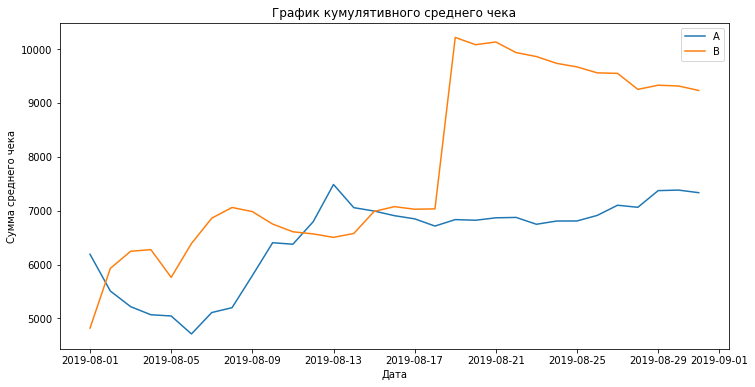

In [18]:
plt.figure(figsize=(12, 6))
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.plot(cummulative_a['date'], cummulative_a['revenue']/cummulative_a['transactions'], label='A')
plt.plot(cummulative_b['date'], cummulative_b['revenue']/cummulative_b['transactions'], label='B')
plt.legend();

Вывод: Сначала в группе A средний чек упал и позже увеличился к концу первой половины, а в группе B - постепенно увеличивался. В начале второй половины видно, что в группе B появились крупные заказы. Средний чек уменьшается у группы B и увеличивается у группы A к концу.

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [19]:
cummulative_ab = cummulative_a.merge(cummulative_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

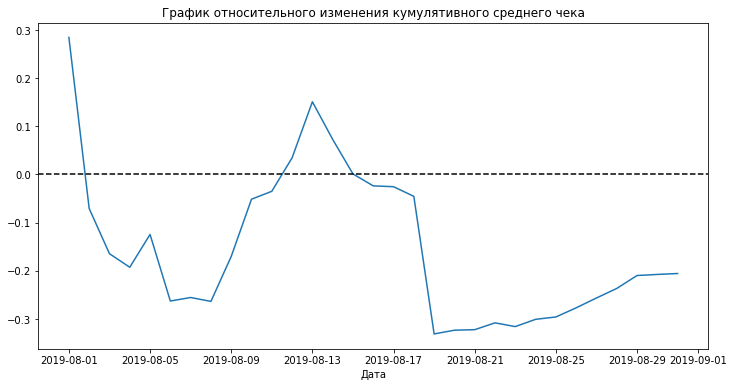

In [20]:
plt.figure(figsize=(12, 6))
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.plot(cummulative_ab['date'], (cummulative_ab['revenue_a'] / cummulative_ab['transactions_a']) / (cummulative_ab['revenue_b'] / cummulative_ab['transactions_b'])-1)
plt.axhline(y=0, color='black', linestyle='--');

Вывод: В нескольких точках графика различия в группах скачат, но несмотря на это у группы B больше показатели среднего чека. Хотя ближе к концу разница уменьшается.

### График кумулятивного среднего количества заказов на посетителя по группам

In [21]:
cummulative_a.loc[:, 'conversion'] = cummulative_a['transactions'] / cummulative_a['visitors']
cummulative_b.loc[:, 'conversion'] = cummulative_b['transactions'] / cummulative_b['visitors']

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


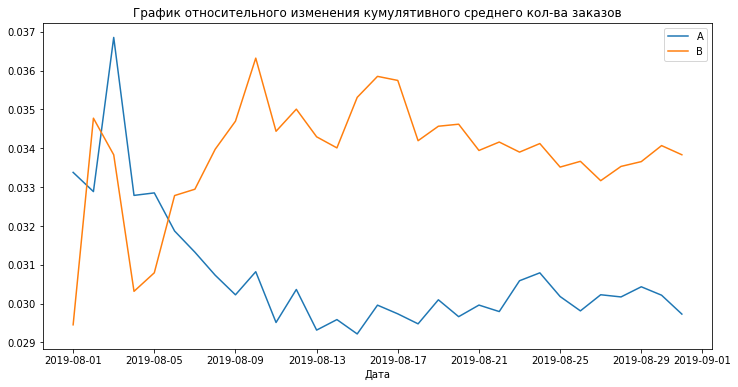

In [22]:
plt.figure(figsize=(12, 6))
plt.title('График относительного изменения кумулятивного среднего кол-ва заказов')
plt.xlabel('Дата')
plt.plot(cummulative_a['date'], cummulative_a['conversion'], label='A')
plt.plot(cummulative_b['date'], cummulative_b['conversion'], label='B')
plt.legend();

Вывод: Группы сильно колебались сначала, но затем у группы B среднее количество заказов вырвалось вперёд и зафиксировалось, а у группы A - просело, но тоже зафиксировалось.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [23]:
cummulative_conversion = cummulative_a.merge(cummulative_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

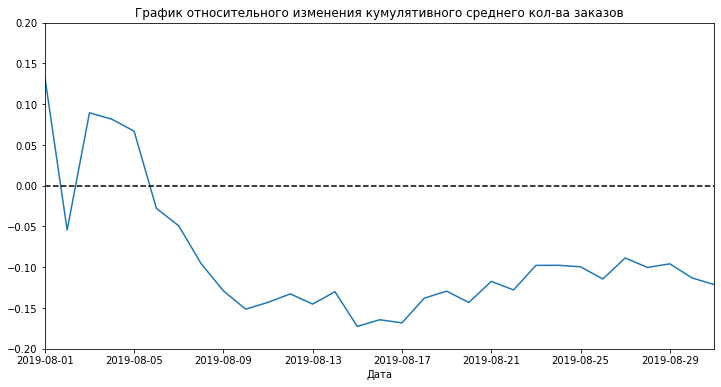

In [24]:
plt.figure(figsize=(12, 6))
plt.title('График относительного изменения кумулятивного среднего кол-ва заказов A к B')
plt.xlabel('Дата')
plt.plot(cummulative_conversion['date'], cummulative_conversion['conversion_a']/cummulative_conversion['conversion_b']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([cummulative_conversion['date'].min(), cummulative_conversion['date'].max(), -0.2, 0.2]);

Вывод: В начале были скачки между группами, но позже группа B стала значительно выигрывать у группы A. Показатели установились и можно сделать вывод, что группа B лидирует.

### Точечный график количества заказов по пользователям

In [25]:
transactions_visitors = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
transactions_visitors.columns = ['visitorId', 'transactions']
transactions_visitors.head()

,visitorId,transactions
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


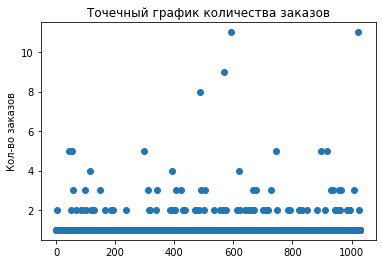

In [26]:
x_values = pd.Series(range(0, len(transactions_visitors)))
plt.title('Точечный график количества заказов')
plt.ylabel('Кол-во заказов')
plt.scatter(x_values, transactions_visitors['transactions']);

Вывод: Достаточно много пользователей имеют от 2 заказов.

### Граница для определения аномальных пользователей

In [27]:
np.percentile(transactions_visitors['transactions'], [95, 99])

array([2., 4.])

Вывод: 5% пользователей имеют больше 2 заказов и 1% - больше 4. За верхнюю границу возьмем 2 заказа, а остальных отсеем.

### Точечный график стоимостей заказов

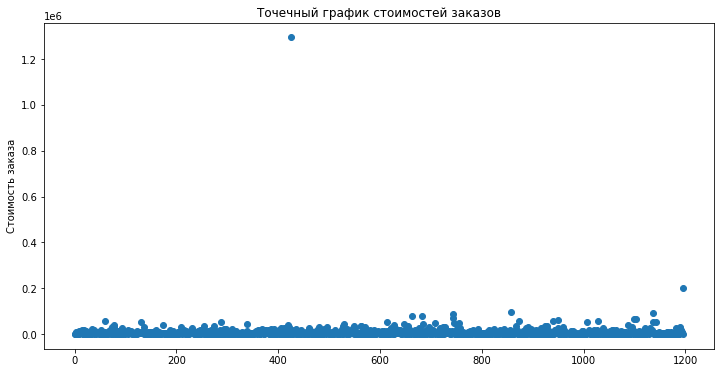

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue']);

Вывод: В основном пользователи делают заказы на сумму до 50тыс. денежных единиц. Также в данных присутствует очень крупный заказ, который мог повлиять на результат теста.

### Граница для определения аномальных заказов

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Вывод: 5% заказов имеют сумму больше 28тыс. денежных единиц, 1% - больше 58тыс. За верхнюю границу возьмем 28тыс.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)


In [32]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Вывод: P-value меньше 5%. Можно сделать вывод, что различия между группами есть. В группе B на 13.8% больше кол-во заказов.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [33]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Вывод: P-value много больше 5%. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B больше среднего чека группы A (на 25.9%).

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [34]:
ordersByUsersAFiltered = ordersByUsersA[ordersByUsersA['orders'] <= 2]
ordersByUsersBFiltered = ordersByUsersB[ordersByUsersB['orders'] <= 2]

sampleAFiltered = pd.concat(
    [
        ordersByUsersAFiltered['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersAFiltered['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersBFiltered['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersBFiltered['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

In [35]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.168


Вывод: Результаты почти не изменились. Разница между группами увеличилась до 16.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [39]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Вывод: P-value немного увеличился, а разница между группами поменялась с 16.8% до -2%. Видимо, аномальные значения относились к группе B, и при очищении разница изменилась.

## Вывод

Имеющиеся факты:
- Есть небольшие различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего чека между группами сообщает, что результаты группы B лучше группы A, но есть тенденции к ухудшению показателей группы B;
- График различия среднего кол-ва заказов говорит о том, что результаты группы B лучше группы A на 10-15%

Решение: Исходя из обнаруженных фактов, тест следует завершить и признать его успешным, так как один из показателей показал разницу в пользу группы B (среднее кол-во закаказов больше на 13-16%).